In [1]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.6     ✔ dplyr   1.0.8
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



character(0)

In [2]:
library(statsr)
library(dplyr)
library(ggplot2)

ERROR: Error in eval(expr, envir, enclos): object 'a' not found


In [3]:
head(ames)

Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,⋯,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
<int>,<int>,<int>,<int>,<int>,<fct>,<int>,<int>,<fct>,<fct>,⋯,<int>,<int>,<fct>,<fct>,<fct>,<int>,<int>,<int>,<fct>,<fct>
1,526301100,1656,215000,20,RL,141,31770,Pave,NA,⋯,0,0,NA,NA,NA,0,5,2010,WD,Normal
2,526350040,896,105000,20,RH,80,11622,Pave,NA,⋯,120,0,NA,MnPrv,NA,0,6,2010,WD,Normal
3,526351010,1329,172000,20,RL,81,14267,Pave,NA,⋯,0,0,NA,NA,Gar2,12500,6,2010,WD,Normal
4,526353030,2110,244000,20,RL,93,11160,Pave,NA,⋯,0,0,NA,NA,NA,0,4,2010,WD,Normal
5,527105010,1629,189900,60,RL,74,13830,Pave,NA,⋯,0,0,NA,MnPrv,NA,0,3,2010,WD,Normal
6,527105030,1604,195500,60,RL,78,9978,Pave,NA,⋯,0,0,NA,NA,NA,0,6,2010,WD,Normal


In [4]:
set.seed(0)
n = 100
sample1 = ames %>% sample_n(size = 100)
#ggplot(data = sample1, aes(x = price)) + geom_histogram(binwidth = 30)

In [5]:
sample1 %>% 
summarise(mean = mean(price), sigma = sd(price),
          lower_bound = mean(price) - qnorm(0.95, lower.tail = T) * sd(price) / sqrt(n),
          upper_bound = mean(price) + qnorm(0.95, lower.tail = T) * sd(price) / sqrt(n))

mean,sigma,lower_bound,upper_bound
<dbl>,<dbl>,<dbl>,<dbl>
187238.3,86869.52,172949.6,201527.1


In [6]:
#set.seed(1)
n = 50
CI = ames %>%
rep_sample_n(size = n, reps = 50, replace = T) %>%
summarise(lower_bound = mean(price) - qnorm(0.95, lower.tail = T) * sd(price) / sqrt(n),
          upper_bound = mean(price) + qnorm(0.95, lower.tail = T) * sd(price) / sqrt(n))


In [7]:
mu = mean(ames$price)
CI = CI %>% 
mutate(capture_mu = ifelse(lower_bound < mu & upper_bound > mu, "Y", "N"))

In [8]:
ravel_CI = data.frame(CI_ID = c(1:50, 1:50),
                      CI_bounds = c(CI$lower_bound, CI$upper_bound),
                      capture_mu = c(CI$capture_mu, CI$capture_mu))

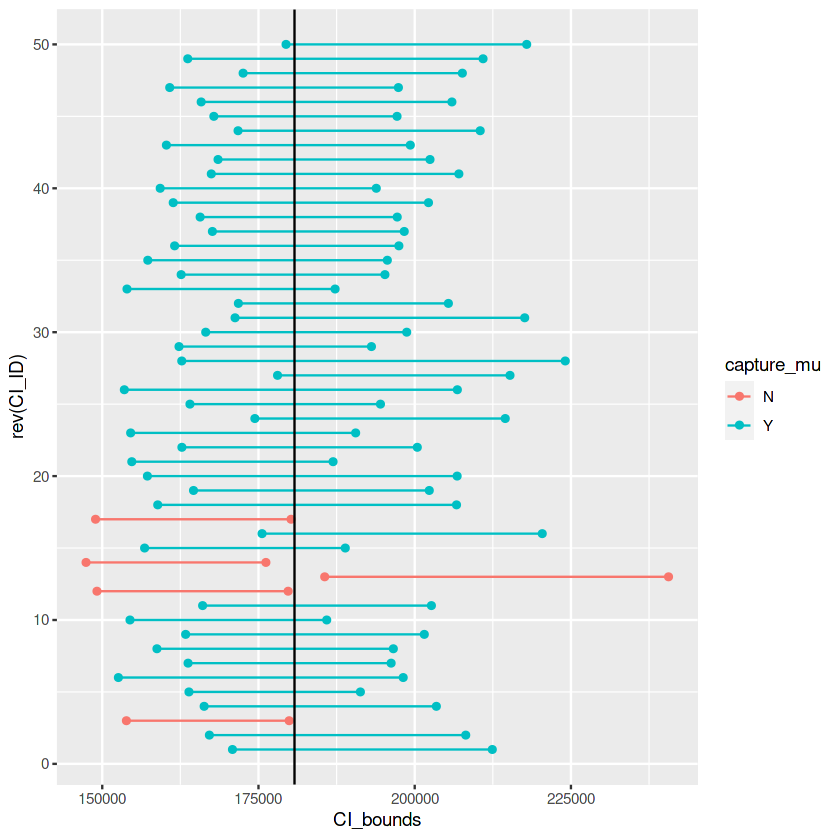

In [9]:
ggplot(data = ravel_CI, aes(x = CI_bounds, y = rev(CI_ID), group = CI_ID, color = capture_mu)) +
geom_line() + geom_point() + geom_vline(xintercept = mu)
#dev.off()

ERROR: Error in eval(expr, envir, enclos): object 'CI_ID' not found
